In [23]:
import MoneyModel as MM
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable
from mesa.batchrunner import BatchRunner
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

# Simple model without space

(array([43., 31., 14.,  0., 10.,  1.,  0.,  0.,  0.,  1.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

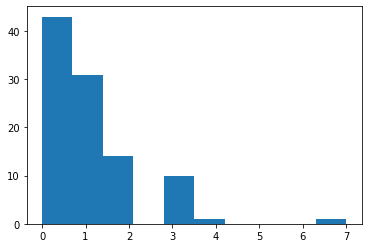

In [3]:
model = MM.MoneyModel(100)
model.run(10)

agent_wealth = [a.wealth for a in model.schedule.agents]
plt.hist(agent_wealth)

In [4]:
# Monte Carlo simulation
def MC_run(runs: int, n_agents: int, steps: int = 10) -> list:
    
    all_wealth = []
    
    for _ in range(runs) :
        model = MM.MoneyModel(n_agents)
        for _ in range(steps) :
            model.step()

        # all_wealth.append([a.wealth for a in model.schedule.agents])
        for a in model.schedule.agents :
            all_wealth.append(a.wealth)

    return all_wealth

Text(0, 0.5, 'frequency')

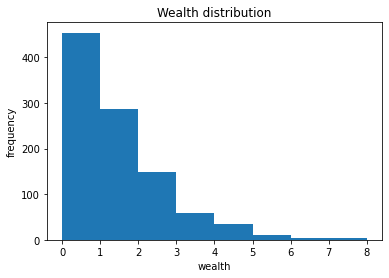

In [5]:
total_wealth = MC_run(10,100)
plt.hist(total_wealth, bins = range(max(total_wealth)+1))
plt.title('Wealth distribution')
plt.xlabel('wealth')
plt.ylabel('frequency')


# Adding space component

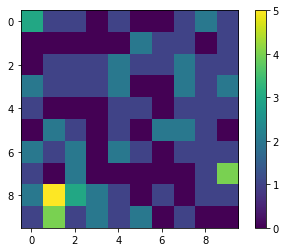

In [15]:
space_model = MM.SpatialMoneyModel(100, 10, 10)
space_model.run(100)

agent_counts = space_model.get_agent_distribution()
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

<AxesSubplot:>

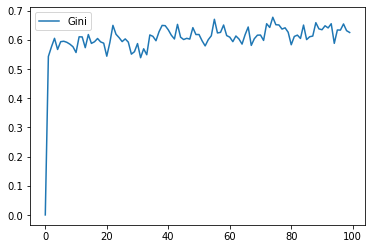

In [16]:
gini = space_model.datacollector.get_model_vars_dataframe()
gini.plot()

Text(0, 0.5, 'Frequency')

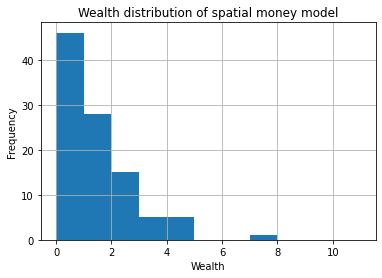

In [18]:
agent_wealth = space_model.datacollector.get_agent_vars_dataframe()
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))
plt.title('Wealth distribution of spatial money model')
plt.xlabel('Wealth')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Step'>

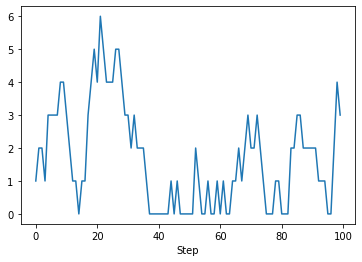

In [19]:
# single agents wealth
a = agent_wealth.xs(22, level='AgentID')
a.Wealth.plot()

In [28]:
def batch_run(model, fixed_params: dict, variable_params: dict) :
    batch_run = BatchRunner( model
                        , variable_params
                        , fixed_params
                        , iterations=5
                        , max_steps=100
                        , model_reporters={"Gini": MM.compute_gini})

    batch_run.run_all()

    return batch_run


In [30]:
fixed_params = {
    "width": 10,
    "height": 10
}
variable_params = {
    "N": range(10, 500, 10)
}
batch_run = batch_run(MM.SpatialMoneyModel, fixed_params, variable_params)

245it [00:54,  4.53it/s]


Text(0, 0.5, 'Gini score')

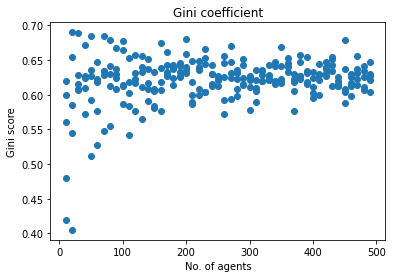

In [32]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.N, run_data.Gini)
plt.title("Gini coefficient")
plt.xlabel("No. of agents")
plt.ylabel('Gini score')